In [546]:
#Necesario para calcular derivadas
import sympy as sp
import numpy as np

#Asi se nombra la variable con la trabajaremos
x = sp.symbols('x', real=True)
#Ejemplo de como crear una funcion con sp
#   f_exp = sp.sin(x) + x**2


def criterio_tercera_derivada(f_exp,sol,lista_pair):
    tercera_derivada=sp.diff(f_exp,x,3)
    print("Tercera derivada: ",tercera_derivada) 
    funcion_evaluada=tercera_derivada.subs({x:sol})
    print("La tercera derivada de la función evaluada en ", sol, " = ",funcion_evaluada) # Evaluamos la expresión f con "subs"
    if (funcion_evaluada<0):
        lista_pair.append((sol, "Tercera"))
        print("AE \n")
    elif funcion_evaluada>0:
        lista_pair.append((sol, "Inestable"))
        print ("Inestable\n")


def criterio_segunda_derivada(f_exp,sol,lista_pair):
    segunda_derivada=sp.diff(f_exp,x,2)
    print("Segunda derivada: ",segunda_derivada)
    funcion_evaluada=segunda_derivada.subs({x:sol})
    print("La segunada derivada de la función evaluada en ", sol, " = ",funcion_evaluada) # Evaluamos la expresión f con "subs"
    if (funcion_evaluada<0):
        lista_pair.append((sol, "Segunda"))
        print("AE por abajo y repulsivo por arriba\n")
    elif funcion_evaluada>0:
        lista_pair.append((sol, "Segunda"))
        print ("AE por arriba y repulsivo por abajo\n")
    else:
        print ("Aplicamos criterio de la tercera derivada")
        criterio_tercera_derivada(f_exp,sol,lista_pair)
    



def criterio_primero_derivada(f_exp,lista):
    tamaño=len(lista)
    print("Expresión que queremos derivar: ",f_exp)
    primera_derivada=sp.diff(f_exp,x)
    print("Primera derivada: ",primera_derivada,"\n")
    
    #Creo un vector de pares para saber el criterio que he usado y aplicarlo en la grafica
    lista_pair=[]

    for i in range (0,tamaño):
        funcion_evaluada=primera_derivada.subs({x:lista[i]})
        print("La función evaluada en ", lista[i], " = ",funcion_evaluada) # Evaluamos la expresión f con "subs"
        if (abs(funcion_evaluada)<1):
            lista_pair.append((lista[i], "Primera"))
            print("AE\n")
        elif abs(funcion_evaluada)>1:
            lista_pair.append((lista[i], "Inestable"))
            print ("Inestable\n")
        elif funcion_evaluada==1:
            print ("Aplicamos criterio de la segunda derivada\n")
            criterio_segunda_derivada(f_exp,lista[i],lista_pair)
        else:
            print ("Criterio distinto\n")

    return(lista_pair)
            



In [640]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np


#Esta funcion la utilizamos para calcular las tangentes de la segunda y tercera derivada
def graficar_recta_tangente(f_exp,secuencia_x,secuencia_y,punto_tangente):
    #Calculamos las coordenadas (x,y) del punto tangente, que al ser un pair tomamos [0] que es el valor numerico
    y_punto=secuencia_y[secuencia_x.index(punto_tangente[0])]
    x_punto=punto_tangente[0]

    #Calculamos m que es la pediente de la derivada, dependiendo del criterio que hayamos aplicado previamente
    if (punto_tangente[1] == "Primera"):
        primera_derivada=sp.diff(f_exp,x)
        m=primera_derivada.subs({x:punto_tangente[0]})  
    elif (punto_tangente[1] == "Segunda"):
        segunda_derivada=sp.diff(f_exp,x,2)
        m=segunda_derivada.subs({x:punto_tangente[0]}) 
    else:
        tercera_derivada=sp.diff(f_exp,x,3)
        m=tercera_derivada.subs({x:punto_tangente[0]})  

    #Funcion para calcular la recta tangente
    def recta_tangente(x):
        return m * (x - x_punto) + y_punto

    y_recta_tangente=[]
    x_recta_tangente=[]

    #Creamos dos vectores para almacenar las coordenadas x e y
    for i in range(len(secuencia_x)):
        y_recta_tangente.append(recta_tangente(secuencia_x[i]))
        x_recta_tangente.append(secuencia_x[i])
                                
    plt.plot(x_recta_tangente, y_recta_tangente, label='Recta tangente', color='green', linestyle='--')
    plt.scatter(x_punto, y_punto, color='red')
    return y_recta_tangente

#Esta funcion la utilizamo para poder hacer el modelo de la telaraña
def graficar_telarana(secuencia_x,secuencia_y,punto_tangente,recta_tangente):
    solucion_x=[]
    solucion_y=[]
    posicion_inicio=(secuencia_x.index(punto_tangente[0]))

    #Hacemos un bucle for que recorre las dos graficas tanto hacia la izquierda como hacia la derecha 
    #alternando el punto que añadimos entre el punto de la recta tangente con el punto de la funcion 
    #con la que estamos trabajando
    for i in range(9,1,-1):
        solucion_x.append(secuencia_x[posicion_inicio+i])
        solucion_x.append(secuencia_x[posicion_inicio+i])
        solucion_y.append(recta_tangente[posicion_inicio+i])
        solucion_y.append(secuencia_y[posicion_inicio+i])
    for i in range(10): 
        solucion_x.append(secuencia_x[posicion_inicio-i])
        solucion_x.append(secuencia_x[posicion_inicio-i])
        solucion_y.append(recta_tangente[posicion_inicio-i])
        solucion_y.append(secuencia_y[posicion_inicio-i])

    plt.plot(solucion_x, solucion_y, color='blue', linestyle='--')
    

def graficar(f_exp, secuencia_x,secuencia_y,sol, x_label, y_label):
    # Crea una figura con dimensiones específicas
    plt.figure(figsize=(10, 6))
    
    # Grafica la secuencia. La longitud de 'secuencia' determina automáticamente el rango en el eje x
    plt.plot(secuencia_x,secuencia_y)

    # Mostrar los puntos a estudiar asintoticamente
    if (sol[1] == "Inestable"):
        punto_tangente=sol
        recta_tangente=graficar_recta_tangente(f_exp,secuencia_x,secuencia_y,punto_tangente)
    else:
        punto_tangente=sol
        recta_tangente=graficar_recta_tangente(f_exp,secuencia_x,secuencia_y,punto_tangente)
        graficar_telarana(secuencia_x,secuencia_y,punto_tangente,recta_tangente)
      
       
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Grafica de la funcion junto con su recta tangente')
    plt.grid(True)
    plt.legend()
    plt.show()



1. Estudia el comportamiento local en torno a los puntos fijos de la ecuación en diferencias

Expresión que queremos derivar:  -x**3/5 + 4*x**2/5 + 2*x/5
Primera derivada:  -3*x**2/5 + 8*x/5 + 2/5 

La función evaluada en  0  =  2/5
AE

La función evaluada en  1  =  7/5
Inestable

La función evaluada en  3  =  -1/5
AE



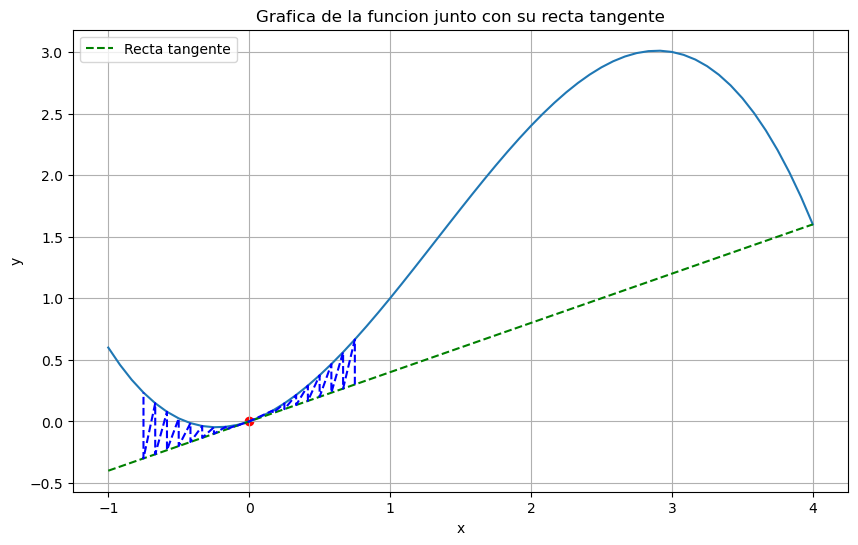

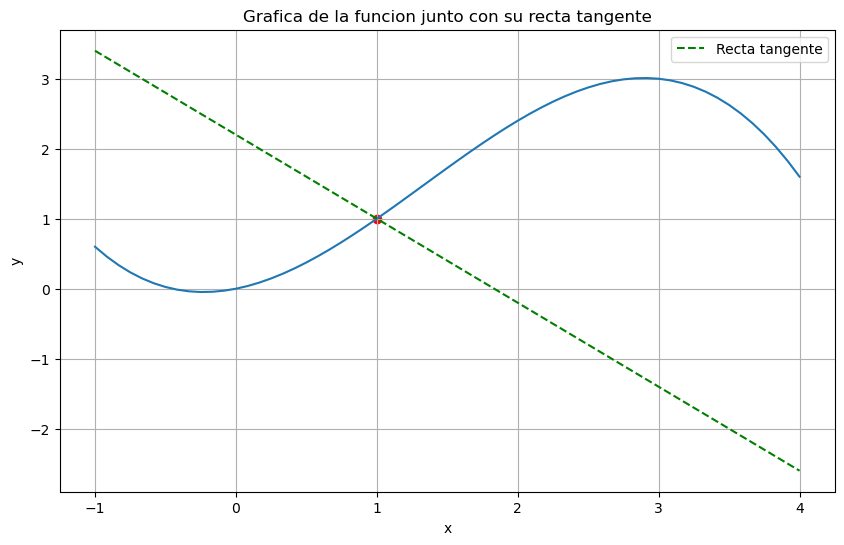

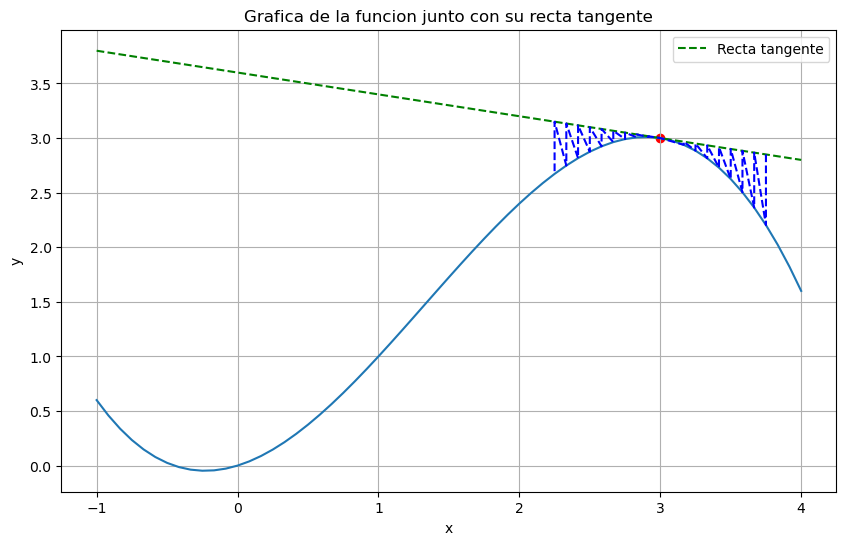

In [641]:
f_1=((2*x+4*(x**2)-x**3)/5)

lista_soluciones=[0,1,3]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(-1, 4, 61):
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))


for i in range (3):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")


2. La ecuación logística de Pielou es una ecuación en diferencias no lineal de la forma.  Dado que no tiene sentido hablar de poblaciones negativas, la ecuación se plantea en [0, ∞).

    a. Calcula los puntos de equilibrio de (1) y demuestra que, para las elecciones α = 2 y β = 1, el punto deequilibrio positivo es asintóticamente estable.

Expresión que queremos derivar:  2*x/(x + 1)
Primera derivada:  -2*x/(x + 1)**2 + 2/(x + 1) 

La función evaluada en  0  =  2
Inestable

La función evaluada en  1  =  1/2
AE



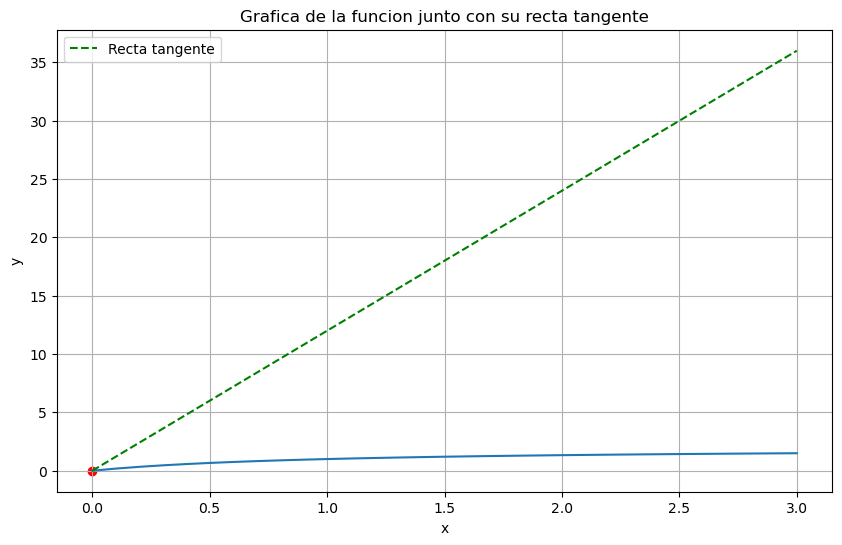

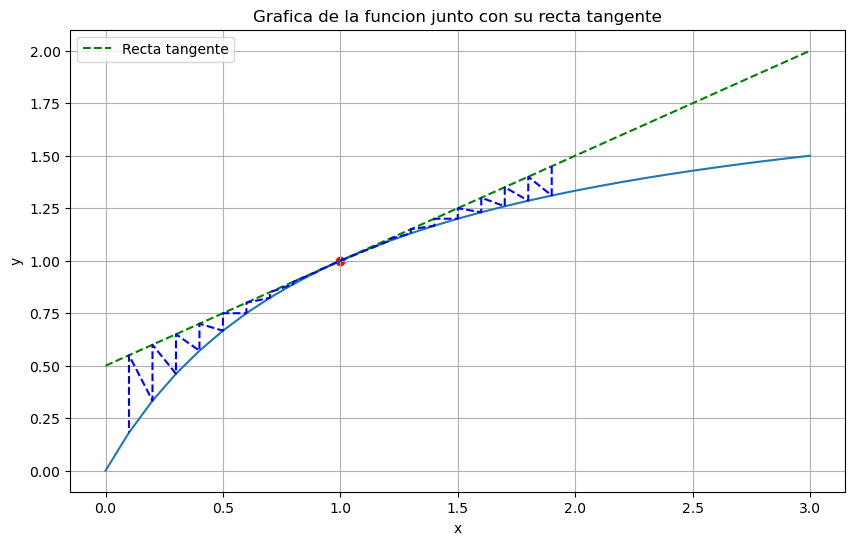

In [642]:
f_1=(2*x/(1+x))

lista_soluciones=[0,1]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(0, 3, 31):
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))

for i in range (2):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")


    c. Determina el comportamiento asintótico de las soluciones de (1).

Expresión que queremos derivar:  2*x/(2*x + 1)
Primera derivada:  -4*x/(2*x + 1)**2 + 2/(2*x + 1) 

La función evaluada en  0.5  =  0.500000000000000
AE



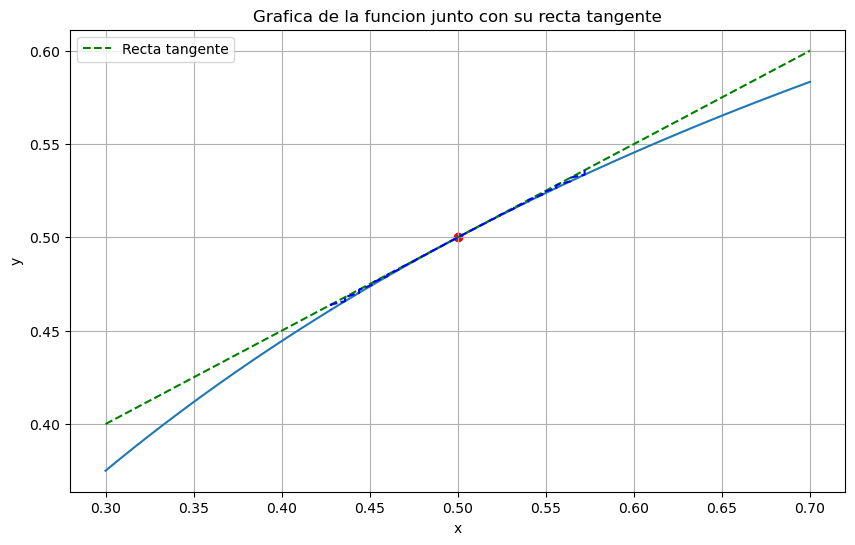

In [652]:
import random

f_1=(a*x/(1+b*x))


opcion=0
if (opcion==0):
    a=2      #Se supone que deberia ser un numero aleatorio mayor que 1 pero asi podemos ajustar el intervalo de for para que no de errores
    b=2
    lista_soluciones=[(a-1)/b]
else:
    a=random.random()
    b=random.randint(0, 100)
    lista_soluciones=[0]


lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(0.3, 0.7, 51):
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))

for i in range (1):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")

3. Una población de ganado se rige por el modelo discreto p_{n+1} = 10p_{n}*e ^{−p_{n}} , n ≥ 0. Calcula sus puntos de equilibrio
y comprueba que son todos inestables

Expresión que queremos derivar:  10*x*exp(x)
Primera derivada:  10*x*exp(x) + 10*exp(x) 

La función evaluada en  0  =  10
Inestable

La función evaluada en  2.302585092994046  =  330.258509299405
Inestable



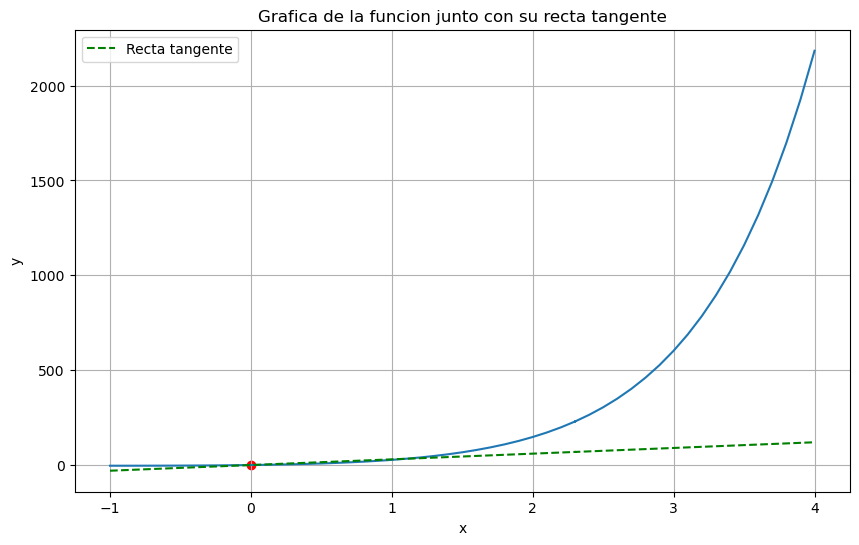

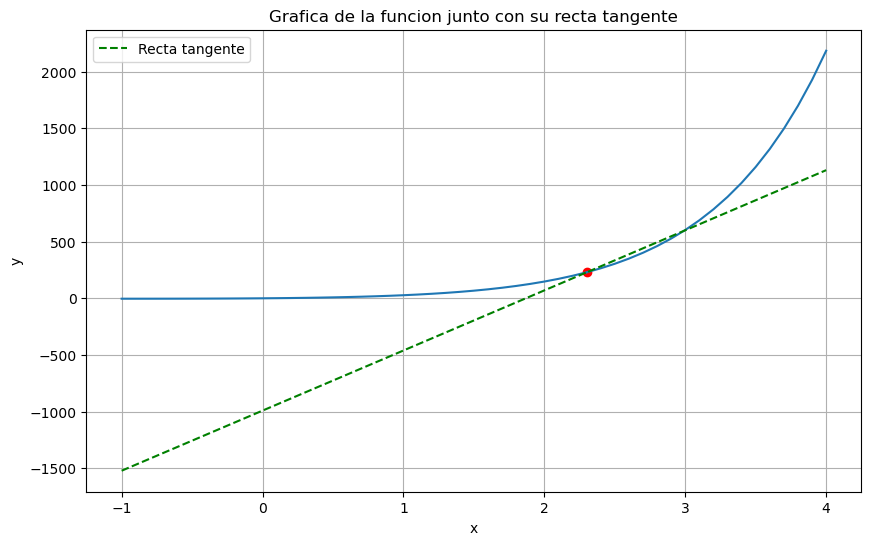

In [644]:
f_1=10*x*(sp.exp(x))

lista_soluciones=[0,np.log(10)]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(-1, 4, 51):
    if(i == 2.3000000000000003):
        lista_x.append(2.302585092994046)
        lista_y.append(f_1.subs({x:2.302585092994046}))
        
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))

for i in range (2):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")

#### 4.   En relación con el modelo del ejercicio anterior, se propone vender una fracción α (0 < α < 1) de la población en cada periodo de tiempo, lo que da lugar al siguiente otro modelo:

$$
p_{n+1} = 10(1 − α)p_{n}e^{−(1−α)p_{n}} .
$$

  #####  a. Encuentra el intervalo abierto (de amplitud máxima) al que debe pertenecer α para que esté asegurada la estabilidad asintótica del punto de equilibrio positivo.
   ##### b. Calcula el valor de α para el que la población (no nula) en equilibrio alcanza su valor máximo.

Expresión que queremos derivar:  4.45664385700189*x*exp(-0.445664385700189*x)
Primera derivada:  -1.98616744681527*x*exp(-0.445664385700189*x) + 4.45664385700189*exp(-0.445664385700189*x) 

La función evaluada en  3.353186909887313  =  -0.494395984332844
AE



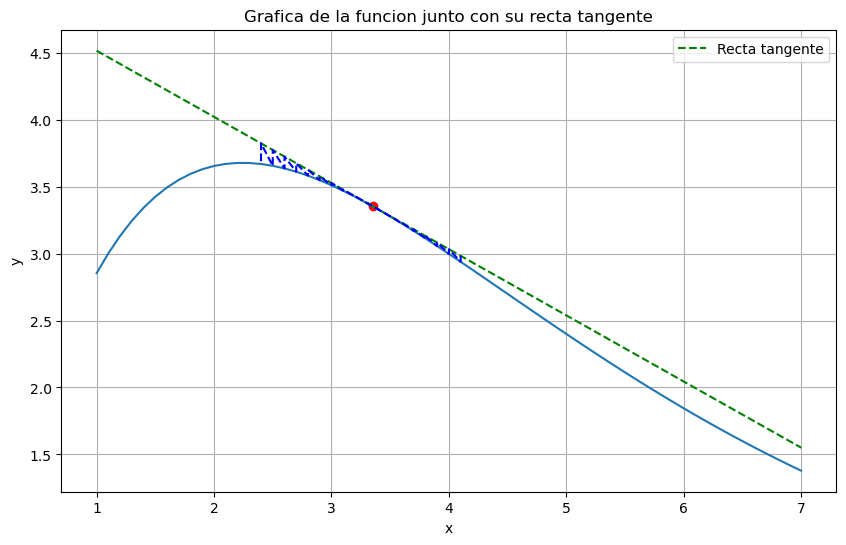

In [645]:
import random

#a=random.uniform(0.2610943901,0.9)
#Deberiamos tomar un valor aleatorio. Por lo que tomamos un valor arbitrario y ajustamos el for para que se pueda imrpimir
a=0.554335614299811

f_1=10*(1-a)*x*(sp.exp(-(1-a)*x))



lista_soluciones=[(np.log(10*(1-a)))/(1-a)]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(1, 7, 61):
    if(i == 3.3000000000000003):
        lista_x.append(3.353186909887313)
        lista_y.append(f_1.subs({x:3.353186909887313}))
        
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))

for i in range (1):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")

#### 6 Estudia la estabilidad de los puntos de equilibrio de la ecuación en diferencias xn+1 = f(xn), donde

$$ 
a) f(x) = 1 − 2x + 3x^{2} − x^{3}
$$.

$$
b) f(x) = x^{2} − x
$$

Expresión que queremos derivar:  -x**3 + 3*x**2 - 2*x + 1
Primera derivada:  -3*x**2 + 6*x - 2 

La función evaluada en  1  =  1
Aplicamos criterio de la segunda derivada

Segunda derivada:  6*(1 - x)
La segunada derivada de la función evaluada en  1  =  0
Aplicamos criterio de la tercera derivada
Tercera derivada:  -6
La tercera derivada de la función evaluada en  1  =  -6
AE 



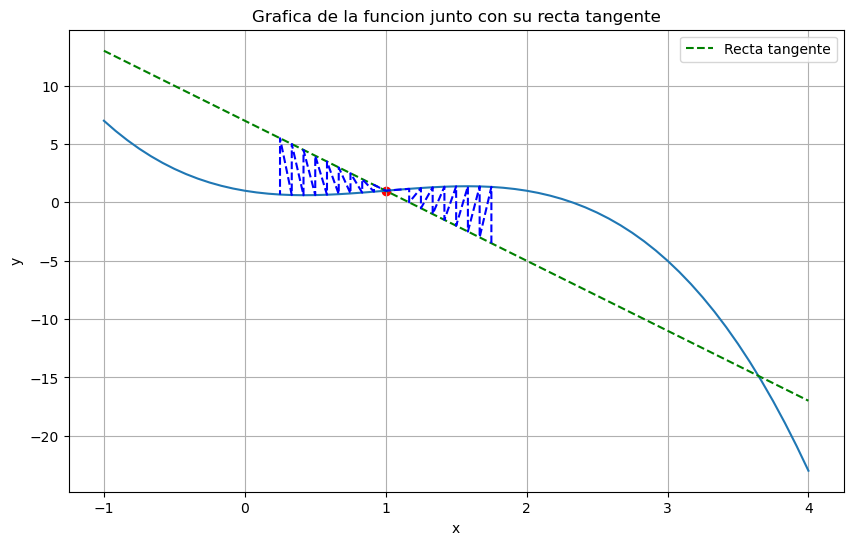

In [655]:
f_1=(1 -2*x+3*x**2-x**3)

lista_soluciones=[1]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(-1, 4, 61):
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))


for i in range (1):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")

Expresión que queremos derivar:  x**2 - x
Primera derivada:  2*x - 1 

La función evaluada en  0  =  -1
Criterio distinto

La función evaluada en  2  =  3
Inestable



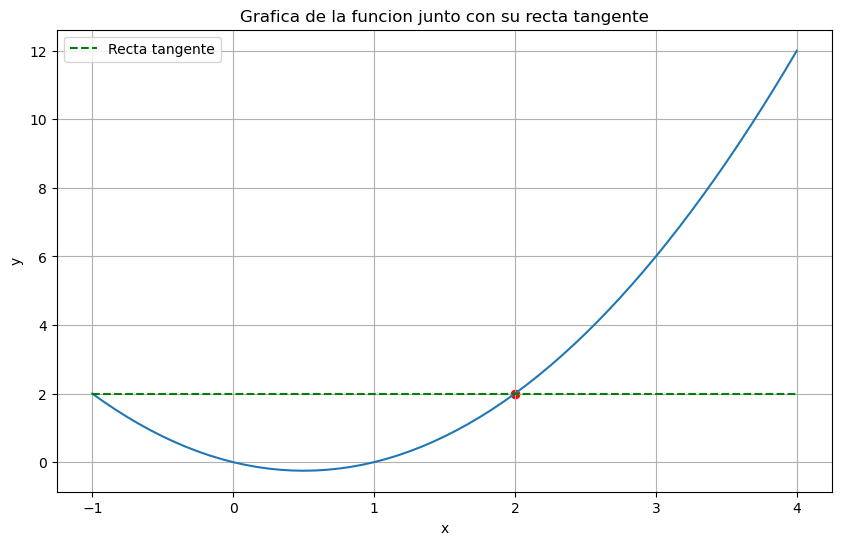

IndexError: list index out of range

In [656]:
f_1=(x**2-x)

lista_soluciones=[0,2]

lista_soluciones=criterio_primero_derivada(f_1,lista_soluciones)

lista_x=[]
lista_y=[]

for i in np.linspace(-1, 4, 61):
    lista_x.append(i)
    lista_y.append(f_1.subs({x:i}))


for i in range (2):
    sol=lista_soluciones[i]
    graficar(f_1,lista_x,lista_y,sol,"x","y")